# Project 5: Neural Network’s Decision Boundary

## I: Load and Plot Task2B Datasets

In [13]:
!pip install pandas
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load the datasets
train_data = pd.read_csv('Task2B_train.csv')
test_data = pd.read_csv('Task2B_test.csv')

In [17]:
# Display basic information about the datasets
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)
print("\nTraining Data Columns:", train_data.columns.tolist())
print("Testing Data Columns:", test_data.columns.tolist())

Training Data Shape: (2000, 3)
Testing Data Shape: (2000, 3)

Training Data Columns: ['feature1', 'feature2', 'label']
Testing Data Columns: ['feature1', 'feature2', 'label']


In [19]:
# Display first few rows to understand the data structure
print("\nFirst 5 rows of training data:")
print(train_data.head())
print("\nFirst 5 rows of testing data:")
print(test_data.head())

# Check unique labels in both datasets
print("\nUnique labels in training data:", train_data.iloc[:, -1].unique())
print("Unique labels in testing data:", test_data.iloc[:, -1].unique())


First 5 rows of training data:
   feature1  feature2  label
0 -0.612143  4.068064      0
1 -0.922175  1.731439      0
2 -0.940942  2.154830      0
3  0.346952  1.024161      0
4  0.670974 -0.132000      0

First 5 rows of testing data:
   feature1  feature2  label
0  0.336603  1.157933      0
1 -0.990020  2.083285      0
2 -1.186954  3.465390      0
3 -1.327837  5.062712      0
4 -0.870706  4.634610      0

Unique labels in training data: [0 1]
Unique labels in testing data: [0 1]


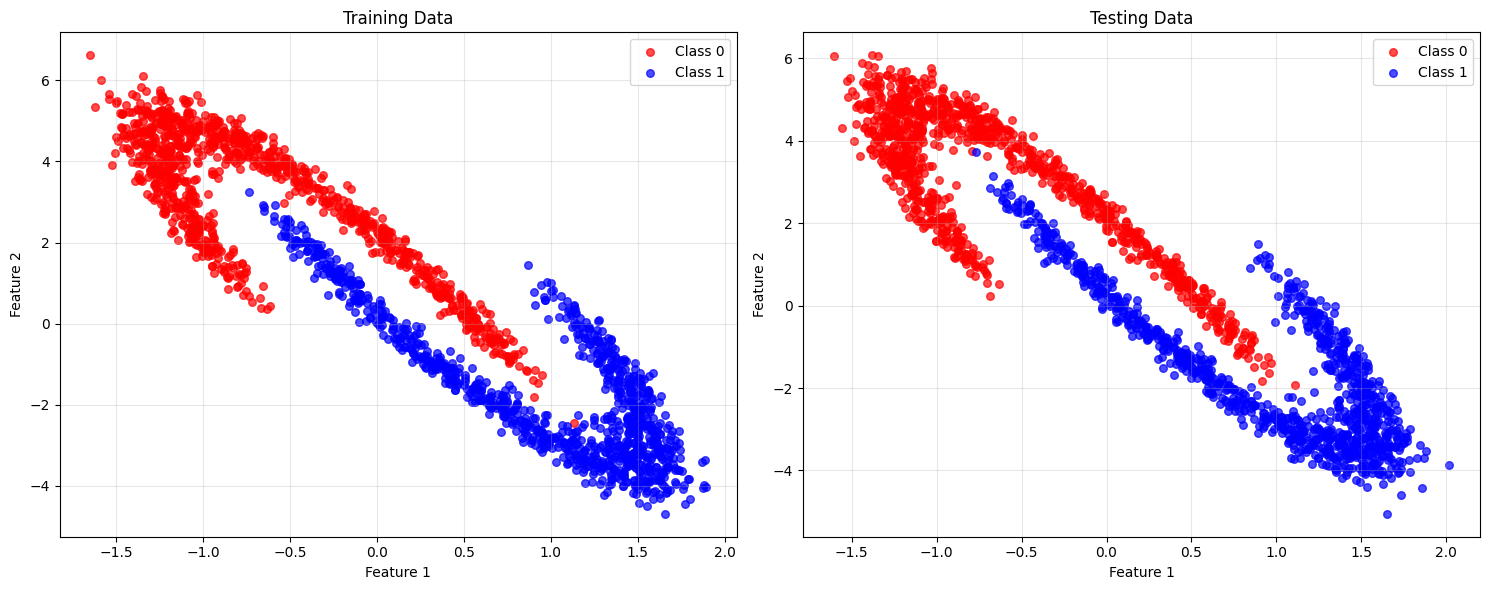


Training data - Class 0: 1000 samples, Class 1: 1000 samples
Testing data - Class 0: 1000 samples, Class 1: 1000 samples


In [21]:
# Create subplots for training and testing data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot training data
# The last column is the label and first two columns are features
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

# Separate data by labels for training set
class_0_train = X_train[y_train == 0]
class_1_train = X_train[y_train == 1]

ax1.scatter(class_0_train[:, 0], class_0_train[:, 1], c='red', alpha=0.7, label='Class 0', s=30)
ax1.scatter(class_1_train[:, 0], class_1_train[:, 1], c='blue', alpha=0.7, label='Class 1', s=30)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Training Data')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot testing data
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Separate data by labels for testing set
class_0_test = X_test[y_test == 0]
class_1_test = X_test[y_test == 1]

ax2.scatter(class_0_test[:, 0], class_0_test[:, 1], c='red', alpha=0.7, label='Class 0', s=30)
ax2.scatter(class_1_test[:, 0], class_1_test[:, 1], c='blue', alpha=0.7, label='Class 1', s=30)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Testing Data')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print data distribution
print(f"\nTraining data - Class 0: {np.sum(y_train == 0)} samples, Class 1: {np.sum(y_train == 1)} samples")
print(f"Testing data - Class 0: {np.sum(y_test == 0)} samples, Class 1: {np.sum(y_test == 1)} samples")

## II: Train Perceptron models with different learning rates

In [27]:
!pip install scikit-learn
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 26.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 29.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [28]:
# Extract features and labels from the loaded datasets
X_train = train_data[['feature1', 'feature2']].values 
y_train = train_data['label'].values
X_test = test_data[['feature1', 'feature2']].values
y_test = test_data['label'].values

# Change labels from [0, 1] to [-1, +1] for perceptron
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)


In [29]:
# Train two Perceptron models with different learning rates η = 0.1 and 1.0
learning_rates = [0.1, 1.0]
test_errors = {}

# Loop through each learning rate to train and evaluate perceptron models
for eta in learning_rates:
    # Create and train perceptron with current learning rate
    perceptron = Perceptron(eta0=eta, max_iter=1000, random_state=42)

    # Train the perceptron on training data
    perceptron.fit(X_train, y_train)
    
    # Make predictions on test data
    y_pred = perceptron.predict(X_test)
    # Calculate test accuracy and error
    accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - accuracy
    test_errors[eta] = test_error
    
    print(f"Learning rate η = {eta}: Test Error = {test_error:.4f}")


Learning rate η = 0.1: Test Error = 0.1255
Learning rate η = 1.0: Test Error = 0.1255


In [30]:
# Find the best learning rate (lowest test error)
best_eta = min(test_errors, key=test_errors.get)
best_model = Perceptron(eta0=best_eta, max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)

print(f"Best η = {best_eta}")

Best η = 0.1


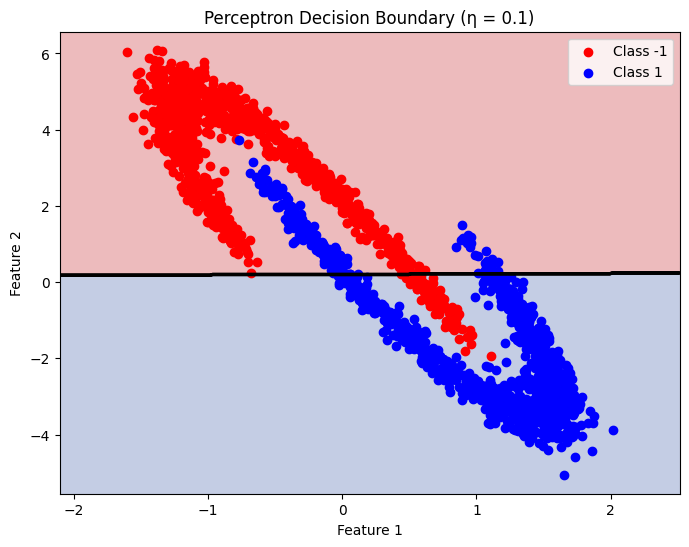

In [31]:
# Plot decision boundary with test data
# Create a mesh of points to visualize decision boundary
h = 0.02  # step size in mesh
x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in the mesh
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and test data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)  # Background colors
plt.contour(xx, yy, Z, colors='black', linestyles='-', linewidths=2)  # Decision boundary line

# Plot test data points with different colors for each class
plt.scatter(X_test[y_test==-1, 0], X_test[y_test==-1, 1], c='red', label='Class -1')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Perceptron Decision Boundary (η = {best_eta})')
plt.legend()
plt.show()

## III: 3-layer Neural Network with different K and η values

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [43]:
# Use the same training and testing data (with -1, +1 labels)
# X_train, y_train, X_test, y_test are already prepared from Part II

# Define parameter ranges
K_values = list(range(5, 45, 5))  # [5, 10, 15, 20, 25, 30, 35, 40]
eta_values = [0.01, 0.001]

# Store results
results = {}
best_error = float('inf')
best_params = {}

print("Training 3-layer Neural Networks:")
print("-" * 50)

Training 3-layer Neural Networks:
--------------------------------------------------


In [45]:
# Train models for each combination of K and η
for K in K_values:
    for eta in eta_values:
        # Create 3-layer Neural Network: Input(2) → Hidden(K neurons, ReLU) → Output(1 neuron, Sigmoid)
        # hidden_layer_sizes=(K,) means one hidden layer with K units
        mlp = MLPClassifier(
            hidden_layer_sizes=(K,), # Hidden layer structure: one layer with K neurons
            learning_rate_init=eta # Initial learning rate
            max_iter=1000, # Maximum iterations to prevent infinite loops
            random_state=42, # Random seed for reproducible results
            solver='adam' # Optimization algorithm: Adam optimizer
        )
        
        # Train the model
        mlp.fit(X_train, y_train)
        
        # Calculate test error
        y_pred = mlp.predict(X_test) # Make predictions on test data
        accuracy = accuracy_score(y_test, y_pred)
        test_error = 1 - accuracy
        
        # Store results
        results[(K, eta)] = test_error
        
        print(f"K = {K:2d}, η = {eta:5.3f}: Test Error = {test_error:.4f}")
        
        # Track best model
        if test_error < best_error:
            best_error = test_error
            best_params = {'K': K, 'eta': eta}
            best_model = mlp

print(f"\nBest combination: K = {best_params['K']}, η = {best_params['eta']}")
print(f"Best test error: {best_error:.4f}")

K =  5, η = 0.010: Test Error = 0.0015


/Users/liuleah/.codegeex/mamba/envs/codegeex-agent/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


K =  5, η = 0.001: Test Error = 0.0210
K = 10, η = 0.010: Test Error = 0.0015
K = 10, η = 0.001: Test Error = 0.0020
K = 15, η = 0.010: Test Error = 0.0015
K = 15, η = 0.001: Test Error = 0.0035
K = 20, η = 0.010: Test Error = 0.0015
K = 20, η = 0.001: Test Error = 0.0025
K = 25, η = 0.010: Test Error = 0.0015
K = 25, η = 0.001: Test Error = 0.0015
K = 30, η = 0.010: Test Error = 0.0020
K = 30, η = 0.001: Test Error = 0.0015
K = 35, η = 0.010: Test Error = 0.0015
K = 35, η = 0.001: Test Error = 0.0015
K = 40, η = 0.010: Test Error = 0.0015
K = 40, η = 0.001: Test Error = 0.0015

Best combination: K = 5, η = 0.01
Best test error: 0.0015


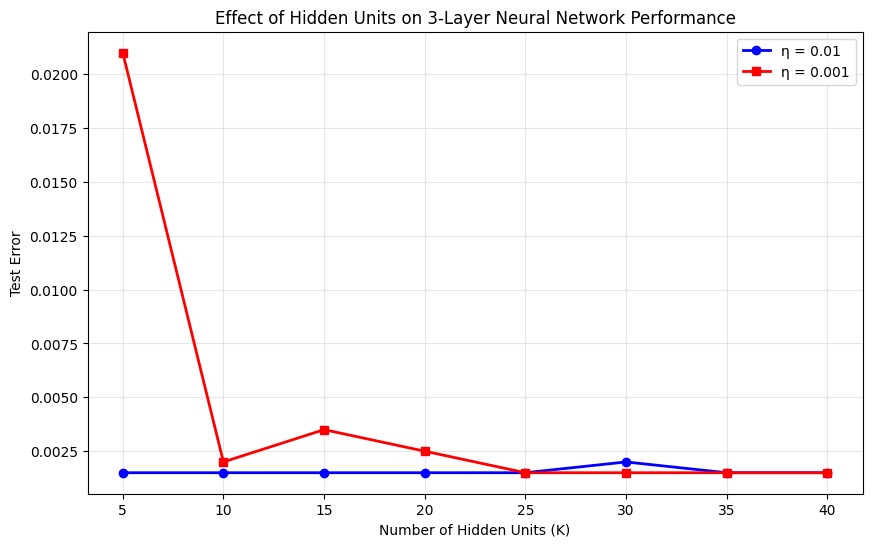

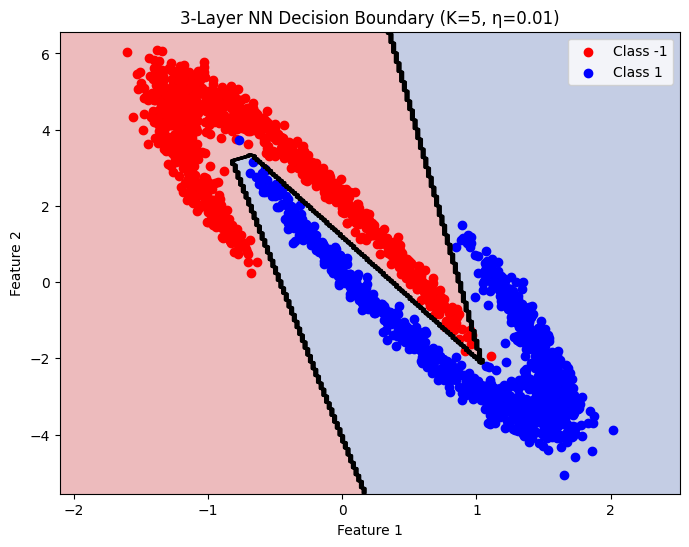

In [46]:
# Plot the effect of different K values on testing accuracy
# Group results by eta for plotting
eta_001_errors = [results[(K, 0.01)] for K in K_values]
eta_0001_errors = [results[(K, 0.001)] for K in K_values]

plt.figure(figsize=(10, 6))
plt.plot(K_values, eta_001_errors, 'b-o', label='η = 0.01', linewidth=2, markersize=6)
plt.plot(K_values, eta_0001_errors, 'r-s', label='η = 0.001', linewidth=2, markersize=6)
plt.xlabel('Number of Hidden Units (K)')
plt.ylabel('Test Error')
plt.title('Effect of Hidden Units on 3-Layer Neural Network Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot decision boundary for the best model
def plot_nn_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get predictions for the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.contour(xx, yy, Z, colors='black', linestyles='-', linewidths=2)
    
    # Plot test data points
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', label='Class -1')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Class 1')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundary for the best neural network
plot_nn_decision_boundary(
    best_model, X_test, y_test, 
    f'3-Layer NN Decision Boundary (K={best_params["K"]}, η={best_params["eta"]})'
)

## IV: Comparison Analysis

### Performance Comparison

**Perceptron Results:**
- Test Error: 0.1255 (12.55%)
- Decision boundary: Linear (straight line)

**3-Layer Neural Network Results:**
- Best Test Error: 0.0015 (0.15%)
- Decision boundary: Non-linear (curved boundary)

---

### 1. Model Assumptions and Capabilities

**Perceptron:**
- **Linear separability assumption**: Can only learn linearly separable patterns
- **Single decision boundary**: Creates only one straight line to separate classes
- **Limited expressiveness**: Cannot capture complex, non-linear relationships

**3-Layer Neural Network:**
- **Non-linear capability**: Hidden layer with activation functions enables non-linear transformations
- **Complex decision boundaries**: Can create curved, multi-segment boundaries
- **Higher expressiveness**: Can approximate complex functions through multiple layers

---

### 2. Decision Boundary Analysis

**From the plots:**

**Perceptron (Step II):**
- Creates a single straight line that cuts through the spiral-like data
- Many points are misclassified because the dataset is not linearly separable
- The linear boundary is too restrictive for this data

**Neural Network (Step III):**
- Forms a non-linear decision boundary that closely follows the data's structure
- Achieves much better separation between the classes
- The boundary adapts to the data’s inherent complexity

---

### 3. Why Neural Networks Perform Better

**Hidden Layer Effect:**
- The hidden layer allows the network to learn intermediate feature representations that enable non-linear transformations of the input space
- It transforms the input space to make the data more separable, which is essential for datasets that are not linearly separable in their original form
- Each hidden unit can extract different abstract features or sub-regions from the data

**Non-linear Activation:**
- Activation functions (e.g., ReLU, sigmoid) introduce non-linearity between layers
- Without them, even multiple layers would be equivalent to a single linear transformation
- Non-linearity enables modeling of complex patterns and decision boundaries

---

### 4. Mathematical Perspective

- **Perceptron:** $f(\mathbf{x}) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)$

  — strictly linear decision boundary

- **3-Layer Neural Network:** $f(\mathbf{x}) = \mathbf{W}_2 \cdot \sigma(\mathbf{W}_1 \cdot \mathbf{x} + \mathbf{b}_1) + b_2$

  — allows flexible, non-linear transformations through learned weights and activation functions

---

### Conclusion

The dramatic improvement from **12.55% error (Perceptron)** to **0.15% error (Neural Network)** highlights the importance of non-linear modeling capabilities. Since the dataset is not linearly separable, the Perceptron cannot achieve low error, while the 3-layer neural network learns a non-linear decision boundary that effectively separates the two classes.
